# Implement Neural Network

Predicting if a person would buy life insurnace based on his age using logistic regression

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


**Split train and test set**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

**Preprocessing: Scale the data so that both age and affordibility are in same scaling range**

In [5]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

In [7]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=1000)

Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step - accuracy: 0.5000 - loss: 0.7113
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.7110
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.7106
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.7102
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.7098
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 0.7094
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5000 - loss: 0.7091
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.7087
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5000 - loss: 0.7083
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 0.7079
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5000 - loss: 0.7076
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - lo

**Evaluate the model on test set**

In [8]:
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.6667 - loss: 0.5855


[0.5854937434196472, 0.6666666865348816]

In [9]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


array([[0.6447142 ],
       [0.56694895],
       [0.40433902],
       [0.59435296],
       [0.64985454],
       [0.6799389 ]], dtype=float32)

In [10]:
y_test

,bought_insurance
2,1
10,0
21,0
11,0
14,1
9,1


**Now get the value of weights and bias from the model**

In [11]:
coef, intercept = model.get_weights()

In [12]:
coef, intercept

(array([[1.1257616],
        [0.7468925]], dtype=float32),
 array([-0.68011606], dtype=float32))

**This means w1=5.060867, w2=1.4086502, bias =-2.9137027**

In [13]:
def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))
sigmoid(18)

0.9999999847700205

**Instead of model.predict, write our own prediction function that uses w1,w2 and bias**

In [14]:
X_test

,age,affordibility
2,47,1
10,18,1
21,26,0
11,28,1
14,49,1
9,61,1


In [16]:
history = model.fit(X_train_scaled, y_train, epochs=1000, verbose=0)

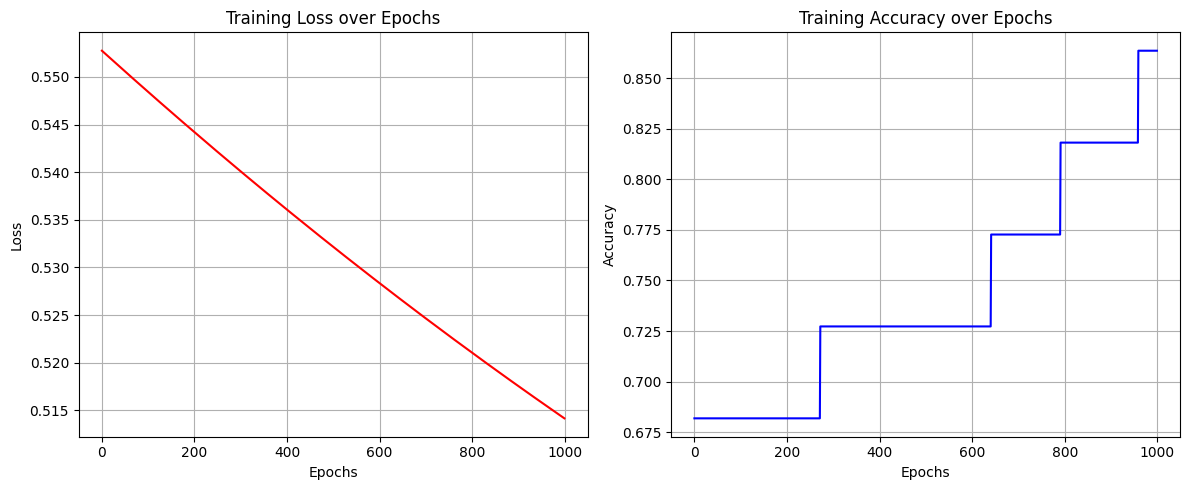

In [17]:
# Plotting training loss over epochs
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='red')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='blue')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()


In [1]:
model.predict(X_test_scaled)

NameError: name 'model' is not defined

**Above you can compare predictions from our own custom model and tensoflow model. You will notice that predictions are almost same**